In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
colors = ["Gold", "SkyBlue", "Coral"]

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
data = pd.merge(ride_data, city_data, on = "city")

# Display the data table for preview
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

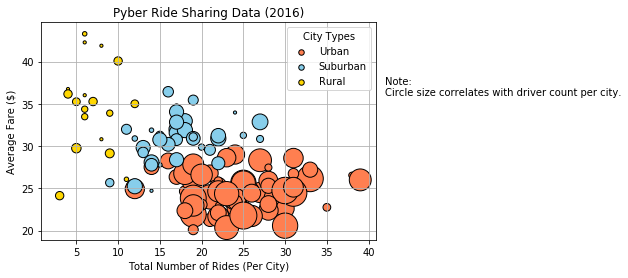

In [2]:
# Obtain the x and y coordinates for each of the three city types
data_by_city = data.groupby(["city", "type", "driver_count"])
average_fare = data_by_city["fare"].mean()
ride_count = data_by_city["ride_id"].count()
ride_sharing_data = pd.DataFrame({"average_fare": average_fare,
                                    "ride_count": ride_count}
                                ).reset_index(level=["city", "type", "driver_count"])

ride_sharing_data_urban = ride_sharing_data[ride_sharing_data['type']=='Urban']
ride_sharing_data_suburban = ride_sharing_data[ride_sharing_data['type']=='Suburban']
ride_sharing_data_rural = ride_sharing_data[ride_sharing_data['type']=='Rural']

# Build the scatter plots for each city types
plt.scatter(
    ride_sharing_data_urban["ride_count"], 
    ride_sharing_data_urban["average_fare"], 
    marker = "o",
    edgecolors="black",
    s = ride_sharing_data_urban["driver_count"]*10,
    facecolors = 'coral',
    label = "Urban"
)
plt.scatter(
    ride_sharing_data_suburban["ride_count"], 
    ride_sharing_data_suburban["average_fare"], 
    marker = "o",
    edgecolors="black",
    s = ride_sharing_data_suburban["driver_count"]*10,
    facecolors = 'skyBlue',
    label = "Suburban"
)
plt.scatter(
    ride_sharing_data_rural["ride_count"], 
    ride_sharing_data_rural["average_fare"], 
    marker = "o",
    edgecolors="black",
    s = ride_sharing_data_rural["driver_count"]*10,
    facecolors = 'gold',
    label = "Rural"
)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(loc="upper right", title= "City Types")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,36,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
plt.savefig("pyber_fig.png")

## Total Fares by City Type

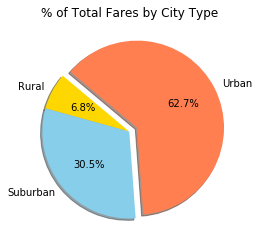

In [3]:
# Calculate Type Percents
type_count = pd.DataFrame(data.groupby(["type"])["fare"].sum())
type_count['percent'] = type_count['fare'] / sum(type_count['fare']) * 100
type_count
# Build Pie Chart

plt.pie(
    type_count["fare"], 
    explode = (0, 0, 0.1), 
    labels = type_count.index, 
    colors = colors, 
    autopct = "%1.1f%%", 
    shadow = True, 
    startangle = 140
)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("fare_by_type_fig.png")


## Total Rides by City Type

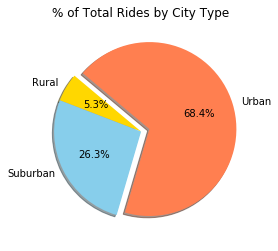

In [4]:
# Calculate Ride Percents
ride_count = pd.DataFrame(data.groupby(["type"])["ride_id"].count())
ride_count['percent'] = ride_count['ride_id'] / sum(ride_count['ride_id']) * 100
ride_count

# Build Pie Chart
plt.pie(
    ride_count["percent"], 
    explode = (0, 0, 0.1), 
    labels = ride_count.index, 
    colors = colors, 
    autopct = "%1.1f%%", 
    shadow = True, 
    startangle = 140
)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("ride_by_type_fig.png")

## Total Drivers by City Type

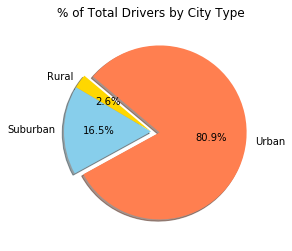

In [5]:
# Calculate Driver Percents
driver_count = pd.DataFrame(city_data.groupby(["type"])["driver_count"].sum())
driver_count['percent'] = driver_count['driver_count'] / sum(driver_count['driver_count']) * 100
driver_count

# Build Pie Charts
plt.pie(
    driver_count["percent"], 
    explode = (0, 0, 0.1), 
    labels = driver_count.index, 
    colors = colors, 
    autopct = "%1.1f%%", 
    shadow = True, 
    startangle = 140
)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("driver_by_type_fig.png")